
# Project: Medical Appointment No-Show Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report attempts to explore a dataset of information that has been collected from 100k medical appointments in Brazil. The purpose of the data collection was to understand the different factors that influence patients to show-up to appointments. In this analysis, I will attempt to clean the dataset first, then focus on the influence of two factors: whether or not the patient has been notified of the appointment by an SMS-message, and the gender of the patient. Those two factors will be explored and visualized in the coming sections below.  



In [29]:
#Here I am importing statements necessary to use for this analysis

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
In this section, I am going to clean the data and make sure that it's good to use for exploration and visulization.
### General Properties

In [30]:
#I am loading the data, and initially exploring the first few rows of the dataset

df = pd.read_csv('KaggleV2-May-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning 

Here, I will be checking for missing data and make adjustments needed to properly investigate the dataset.

In [31]:
#This is to explore how many columns and rows are in this dataset
df.shape

(110527, 14)

In [32]:
#I am viewing the columns present in this dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [33]:
#Next, I am attempting to see if there are any missing data to fill
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


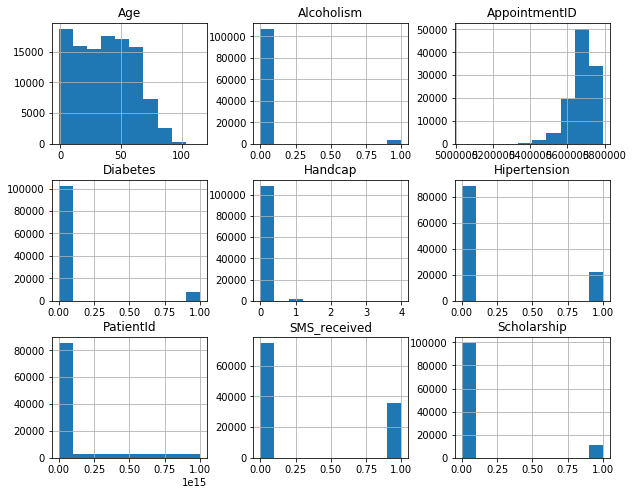

In [34]:
#There are no missing data
#Here, I am visualizing the different columns to better understand which data I decide on using for analysis later on
df.hist(figsize=(10,8));

The above histograms are single-variable plots for the different variables of the patients. Each histogram plot has the corresponding variable as a title above it.

<a id='eda'></a>
## Exploratory Data Analysis
In this step, two research questions were proposed for exploration and visualization. 

### Research Question 1: How many patients showed-up/didn't show-up after SMS messages were sent? 

In [35]:
sms_noShow = df.groupby('No-show')['SMS_received']

In [36]:
sms_noShow.mean()

No-show
No     0.291334
Yes    0.438371
Name: SMS_received, dtype: float64

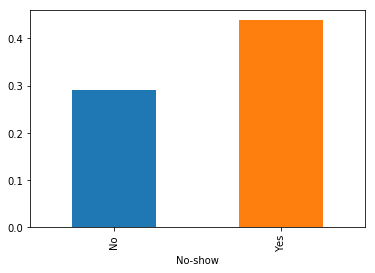

In [37]:
# Bar plot to better visualize the output of the cell above
sms_noShow.mean().plot(kind='bar');

In the plot above, the results show that the mean of patients who did not show-up (orange) is more than the mean of those who did (blue).

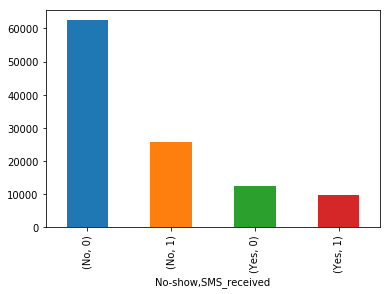

In [38]:
sms_noShowCount = sms_noShow.value_counts()
sms_noShowCount.plot(kind='bar');

The bar plot above shows the counts for four categories: those who did not recieve an sms but did show-up, those who recieved an sms and did show-up, those who did not recieve an sms and did not showe-up, and lastly, those who recieved an sms but did not show-up to their appointment (order is from left to right).

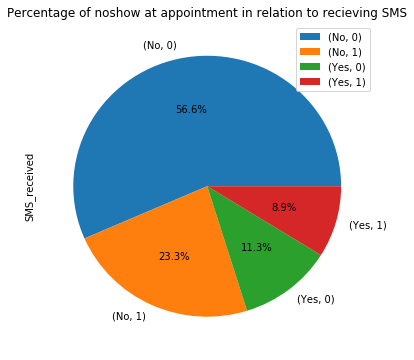

In [39]:
sms_noShowCount.plot.pie(title='Percentage of noshow at appointment in relation to recieving SMS', figsize=(6,6), autopct='%.1f%%', legend=True);

The pie plot above is demonstrating the same information as the previous bar plot, the difference is that in this case the values are shown as percentages. It can be seen that the largest percentage with a value of 56.6% is of those who did not recieve an sms and did show-up (blue), and the smallest percentage with a value of 8.9% is of those who recieved an sms but did not show-up (orange).

### Research Question 2: How many patients showed-up/didn't show-up according to gender?

In [40]:
gender_noShowCount = df.groupby('No-show')['Gender'].value_counts()

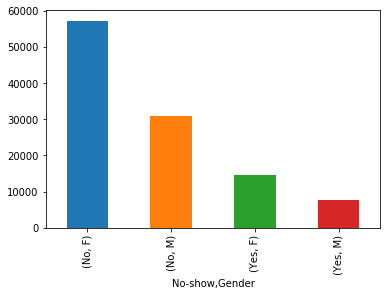

In [41]:
gender_noShowCount.plot(kind='bar');

It can be seen from the bar plot above that the majority of patients who did show-up to their appointments are females.

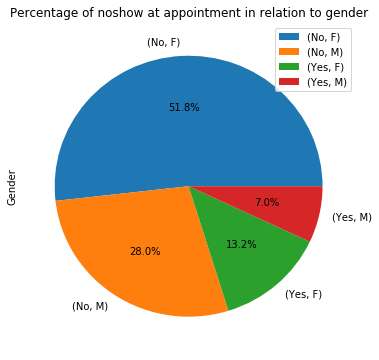

In [42]:
gender_noShowCount.plot.pie(title='Percentage of noshow at appointment in relation to gender', figsize=(6,6), autopct='%.1f%%', legend=True);

The pie chart above demonstrates the same information as in the previous bar plot, but in this case it is shown as percentages.
It is clear that the percentage of females who showed-up to their appointments is 51.8% of the sample acquired, while the males who showed-up are only 28% of the sample.

<a id='conclusions'></a>
## Conclusions


After cleaning the data, two questions were proposed. The first question explored the likelyhood of patients to show-up to appointments having SMS messages sent out. The second question explored how likely it is for a female patient, as opposed to male, to show-up to appointments. 


**Findings**
- *Research Question 1* shows that there is not much of an impact on whether the patient showed-up or not after recieveing an sms.


- *Research Question 2* shows that female patients are more likely to show up to appointement as opposed to male patients.


**Limitations**
It is not clear when the patients recieved the sms message. It could have been recieved a long time before the appointment which could have resulted in them forgetting about it. In addition to that, the patient's phone number that is at the hospital's database could be wrong, so the message may have reached the wrong person.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0